<a href="https://colab.research.google.com/github/chingyaousf/Machine-Learning-Prediction-of-NGFK-dependency-in-HNC-Head-and-Neck-Cancer-/blob/main/scripts/MLpredictionDep_03_Model_RF_HNC_EGFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing Libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [180]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,0.010809,0.047841,0.011180,0.058504,0.015144,0.130345,0.035369,0.080012,0.012757,0.029946
1,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.017735,0.014966,0.005170,0.026705,0.030264,0.115061,0.043774,0.034722,0.037272,0.059803
2,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.076083,0.089749,0.000301,0.053187,0.036138,0.041554,0.045365,0.144591,0.144999,0.023495
3,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.060026,0.018062,0.009606,0.772103,0.071000,0.047310,0.054315,0.085632,0.030331,0.012053
4,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,0.027071,0.036544,0.058257,0.960308,0.354088,0.031446,0.080074,0.062992,0.072876,0.032109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.077891,0.035609,0.013046,0.071244,0.036858,0.153179,0.106557,0.022251,0.017128,0.023691
1001,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.064771,0.023082,0.000226,0.049159,0.404692,0.010889,0.436147,0.028846,0.002251,0.030036
1002,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,0.072872,0.150488,0.016647,0.143674,0.595750,0.109431,0.054756,0.027227,0.061015,0.019873
1003,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,0.041685,0.079168,0.029636,0.610254,0.087387,0.050901,0.085068,0.034314,0.016053,0.036186


In [20]:
## ok

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table.csv'
df = pd.read_csv(dataset_path)

# Check for missing values and handle them if needed
print(df.isnull().sum())

# Scale the data using standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('DepMap_ID', axis=1))

# Apply K-means clustering
k = 5  # You can change this value based on the elbow method or silhouette score analysis
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Iterate through each cluster and save to CSV files
for cluster_num in range(k):
    cluster_df = df[df['Cluster'] == cluster_num].copy()
    cluster_df.drop('Cluster', axis=1, inplace=True)  # Drop the 'Cluster' column before saving
    csv_filename = f"filtered_arranged_hnc_table_kmeans_c{cluster_num}.csv"
    csv_path = f"/content/drive/MyDrive/Colab Notebooks/features engineering/{csv_filename}"
    cluster_df.to_csv(csv_path, index=False)
    print(f"Cluster {cluster_num} saved to {csv_filename}")

    # Display the content of the saved DataFrame
    display(cluster_df)


DepMap_ID             0
A1BG (1) Exp          0
A1CF (29974) Exp      0
A2M (2) Exp           0
A2ML1 (144568) Exp    0
                     ..
MAPK3 (5595) Dep      0
MET (4233) Dep        0
NOTCH1 (4851) Dep     0
NOTCH2 (4853) Dep     0
NOTCH3 (4854) Dep     0
Length: 17294, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 saved to filtered_arranged_hnc_table_kmeans_c0.csv


,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
9,ACH-000015,4.808385,0.214125,3.297191,0.000000,0.000000,1.280956,0.238787,6.420718,4.139961,...,0.022702,0.029344,0.013853,0.071994,0.505399,0.104644,0.055410,0.020172,0.011718,0.109397
24,ACH-000039,4.631104,0.028569,0.757023,1.799087,0.000000,0.831877,0.028569,6.346248,3.336283,...,0.118323,0.073357,0.001101,0.032617,0.024051,0.036871,0.058043,0.017113,0.036369,0.055273
26,ACH-000041,4.338424,0.014355,0.925999,3.288359,0.124328,5.915999,0.000000,6.932628,4.158660,...,0.024922,0.015940,0.008504,0.030871,0.029185,0.019198,0.073544,0.019734,0.017545,0.017750
29,ACH-000048,4.196922,0.000000,6.903761,0.014355,0.028569,2.244887,0.042644,6.233044,4.313246,...,0.039668,0.011992,0.011494,0.112563,0.043487,0.092021,0.025032,0.013837,0.017472,0.093850
30,ACH-000052,4.867402,0.000000,1.992768,3.187451,0.084064,4.620586,0.189034,6.641546,4.529196,...,0.254843,0.035807,0.035257,0.229195,0.495645,0.043752,0.138810,0.011953,0.174840,0.048623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,ACH-001820,0.731183,0.000000,5.772414,0.659925,0.000000,0.014355,0.000000,4.496335,2.831877,...,0.052886,0.011863,0.000917,0.088219,0.114187,0.016263,0.074603,0.034263,0.064260,0.006085
938,ACH-001991,1.655352,0.000000,1.321928,0.000000,0.000000,2.056584,0.000000,5.359310,4.069530,...,0.144552,0.020604,0.008799,0.023941,0.035524,0.057638,0.012696,0.025009,0.001413,0.008149
964,ACH-002044,1.097611,0.000000,0.111031,0.000000,0.000000,3.161888,0.000000,5.890690,3.748461,...,0.018298,0.056231,0.011790,0.152965,0.113141,0.111990,0.100637,0.048542,0.013892,0.050985
967,ACH-002048,2.163499,0.014355,0.650765,0.000000,0.000000,0.799087,0.000000,5.750070,3.077243,...,0.238185,0.041569,0.004817,0.035777,0.024235,0.071440,0.306688,0.019857,0.019502,0.009647


Cluster 1 saved to filtered_arranged_hnc_table_kmeans_c1.csv


,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
1,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.017735,0.014966,0.005170,0.026705,0.030264,0.115061,0.043774,0.034722,0.037272,0.059803
2,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.076083,0.089749,0.000301,0.053187,0.036138,0.041554,0.045365,0.144591,0.144999,0.023495
16,ACH-000024,0.111031,0.028569,0.263034,0.014355,0.000000,0.014355,0.000000,6.067811,4.491853,...,0.221874,0.085974,0.003255,0.066605,0.154339,0.136587,0.064096,0.040796,0.027934,0.209535
28,ACH-000045,1.448901,0.014355,0.014355,0.014355,0.028569,0.356144,0.000000,5.436295,4.402586,...,0.052605,0.055175,0.015503,0.014327,0.014150,0.041041,0.054919,0.006762,0.009275,0.068079
31,ACH-000053,4.395063,0.014355,0.070389,0.000000,0.042644,0.176323,0.000000,5.298292,4.370164,...,0.163822,0.409026,0.014426,0.192320,0.012807,0.052596,0.045621,0.084123,0.036263,0.042697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,ACH-001737,5.898934,0.014355,0.000000,0.000000,0.028569,0.000000,0.014355,5.742276,3.272023,...,0.016056,0.004395,0.125072,0.003128,0.478680,0.165790,0.015652,0.107757,0.091082,0.113065
940,ACH-001993,3.636915,0.000000,0.214125,0.042644,0.000000,0.000000,0.000000,5.167519,3.910733,...,0.156884,0.245153,0.001748,0.043952,0.066723,0.133320,0.056146,0.135896,0.017341,0.099852
969,ACH-002059,2.550901,0.000000,0.028569,0.124328,0.000000,0.000000,0.000000,6.091700,3.432959,...,0.052206,0.532988,0.008914,0.035644,0.046069,0.079225,0.046811,0.038586,0.048580,0.054363
970,ACH-002061,1.570463,0.000000,0.411426,0.622930,0.000000,0.056584,0.000000,5.609400,3.097611,...,0.038962,0.140481,0.011758,0.331594,0.809121,0.011672,0.098476,0.059573,0.291916,0.086569


Cluster 2 saved to filtered_arranged_hnc_table_kmeans_c2.csv


,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
72,ACH-000139,0.014355,0.014355,0.124328,2.384050,0.000000,0.555816,0.042644,5.651626,4.035624,...,0.016555,0.251151,0.015647,0.677544,0.199661,0.209764,0.036372,0.009627,0.033683,0.013486
103,ACH-000188,2.432959,0.014355,0.189034,0.298658,0.000000,3.928844,0.028569,5.015694,3.403268,...,0.018844,0.010768,0.002539,0.637190,0.010167,0.013971,0.059166,0.029759,0.051393,0.112305
147,ACH-000256,4.513491,0.014355,2.495695,0.097611,0.000000,1.589763,0.000000,4.538538,3.902074,...,0.016328,0.022183,0.006761,0.014774,0.044196,0.028467,0.019292,0.044328,0.008690,0.063711
160,ACH-000272,0.443607,0.000000,0.070389,0.000000,0.097611,2.505891,1.014355,4.953731,3.599318,...,0.039159,0.164766,0.136584,0.706549,0.023426,0.030594,0.106002,0.070723,0.053082,0.063307
179,ACH-000302,3.946731,0.000000,0.150560,0.028569,0.000000,3.196922,0.286881,4.769243,3.771886,...,0.140366,0.162286,0.025083,0.726874,0.237621,0.032165,0.122492,0.022579,0.078094,0.090319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,ACH-002446,2.931683,0.000000,0.056584,0.000000,0.000000,2.634593,0.014355,5.119356,3.150560,...,0.804369,0.173640,0.003850,0.932592,0.965930,0.056414,0.025418,0.068193,0.208153,0.083524
989,ACH-002510,3.655352,0.000000,5.692650,0.028569,0.000000,0.014355,0.000000,4.883132,2.599318,...,0.041325,0.002787,0.009979,0.099869,0.981826,0.038350,0.039296,0.064815,0.035451,0.006199
992,ACH-002659,0.014355,2.847997,0.000000,0.000000,0.000000,0.014355,0.014355,4.769243,4.453518,...,0.290031,0.055594,0.006752,0.045693,0.574012,0.331940,0.061328,0.019823,0.033701,0.045139
997,ACH-002687,3.080658,0.000000,9.446711,0.014355,0.000000,0.070389,0.000000,4.729009,3.111031,...,0.199670,0.080445,0.230135,0.225164,0.039500,0.266509,0.125411,0.023147,0.041142,0.007553


Cluster 3 saved to filtered_arranged_hnc_table_kmeans_c3.csv


,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
8,ACH-000014,6.058749,0.042644,6.260402,0.238787,0.042644,1.226509,0.070389,5.801159,5.118941,...,0.047441,0.119026,0.372630,0.130807,0.979432,0.216811,0.049993,0.177530,0.007220,0.001154
11,ACH-000018,0.111031,0.000000,0.226509,0.014355,0.000000,2.378512,0.014355,5.999775,4.566815,...,0.040401,0.022821,0.057345,0.046109,0.116345,0.040809,0.020625,0.136049,0.009238,0.010842
15,ACH-000023,0.000000,0.056584,0.150560,0.000000,0.028569,2.361768,0.014355,5.409391,4.531069,...,0.051200,0.131015,0.014920,0.428345,0.608366,0.095018,0.062951,0.055382,0.019095,0.103823
17,ACH-000025,4.241840,0.014355,0.056584,0.000000,0.028569,2.482848,0.014355,5.131754,3.628774,...,0.021371,0.003900,0.002095,0.033389,0.336676,0.204333,0.015071,0.049680,0.033898,0.021259
22,ACH-000036,2.560715,0.097611,0.189034,0.000000,0.042644,3.442280,0.014355,5.222264,4.053980,...,0.183188,0.238606,0.063504,0.256160,0.376084,0.065481,0.918443,0.020409,0.000019,0.062059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.077891,0.035609,0.013046,0.071244,0.036858,0.153179,0.106557,0.022251,0.017128,0.023691
1001,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.064771,0.023082,0.000226,0.049159,0.404692,0.010889,0.436147,0.028846,0.002251,0.030036
1002,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,0.072872,0.150488,0.016647,0.143674,0.595750,0.109431,0.054756,0.027227,0.061015,0.019873
1003,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,0.041685,0.079168,0.029636,0.610254,0.087387,0.050901,0.085068,0.034314,0.016053,0.036186


Cluster 4 saved to filtered_arranged_hnc_table_kmeans_c4.csv


,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,0.010809,0.047841,0.011180,0.058504,0.015144,0.130345,0.035369,0.080012,0.012757,0.029946
3,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.060026,0.018062,0.009606,0.772103,0.071000,0.047310,0.054315,0.085632,0.030331,0.012053
4,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,0.027071,0.036544,0.058257,0.960308,0.354088,0.031446,0.080074,0.062992,0.072876,0.032109
5,ACH-000011,1.035624,0.084064,0.042644,0.014355,0.000000,3.531069,0.286881,6.093814,3.758090,...,0.087815,0.030420,0.008512,0.566384,0.021220,0.230961,0.080545,0.016328,0.019315,0.048375
6,ACH-000012,2.341986,0.028569,0.070389,0.014355,0.000000,2.226509,0.000000,4.799605,5.122673,...,0.010698,0.041667,0.007650,0.098367,0.067051,0.104643,0.066233,0.091619,0.015663,0.117342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,ACH-002045,0.275007,0.000000,0.000000,0.871844,0.000000,3.819668,0.000000,4.286142,4.575312,...,0.205566,0.096750,0.013465,0.103704,0.170373,0.290042,0.124043,0.106909,0.035209,0.074442
991,ACH-002647,0.042644,0.000000,0.863938,1.028569,0.000000,4.397118,0.000000,5.857732,2.750607,...,0.123051,0.085745,0.000615,0.555908,0.024304,0.017610,0.052510,0.083945,0.068858,0.064139
993,ACH-002664,0.000000,0.000000,0.000000,0.575312,0.000000,2.134221,0.000000,5.467279,4.574707,...,0.046147,0.179899,0.009266,0.117588,0.051452,0.070265,0.061786,0.092043,0.160963,0.058981
994,ACH-002669,0.014355,1.035624,0.000000,0.000000,0.000000,1.361768,0.028569,4.840967,4.782409,...,0.560013,0.153400,0.010667,0.579982,0.939022,0.093582,0.107187,0.060303,0.032037,0.104458


DepMap_ID             0
A1BG (1) Exp          0
A1CF (29974) Exp      0
A2M (2) Exp           0
A2ML1 (144568) Exp    0
                     ..
MAPK3 (5595) Dep      0
MET (4233) Dep        0
NOTCH1 (4851) Dep     0
NOTCH2 (4853) Dep     0
NOTCH3 (4854) Dep     0
Length: 17294, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


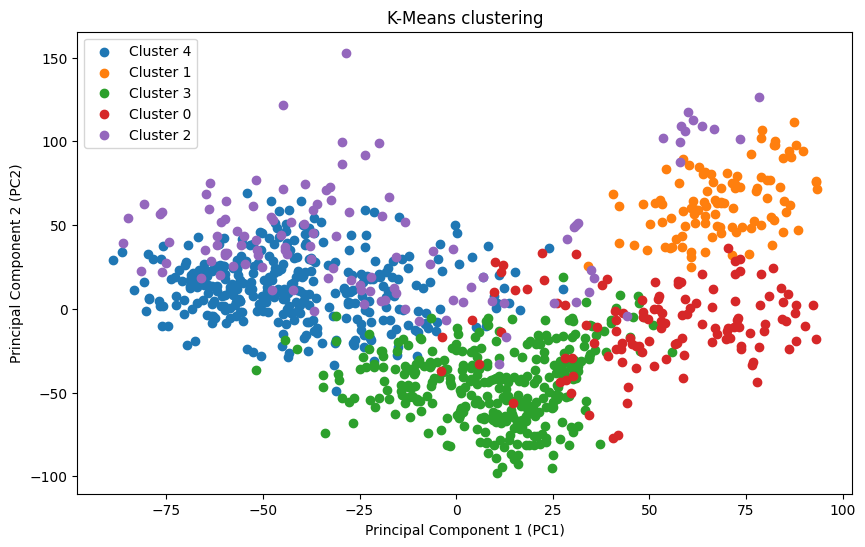

In [178]:
# filtered_arranged_hnc_table K-Means clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table.csv'
df = pd.read_csv(dataset_path)

# Check for missing values and handle them if needed
print(df.isnull().sum())

# Scale the data using standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('DepMap_ID', axis=1))

# Apply K-means clustering
k = 5  # You can change this value based on the elbow method or silhouette score analysis
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Perform PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop(['DepMap_ID', 'Cluster'], axis=1))

# Add the cluster labels to the reduced data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

# Plot clusters in 2D space
plt.figure(figsize=(10, 6))
for cluster_label in df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f"Cluster {cluster_label}")

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title("K-Means clustering")
plt.legend()
plt.show()

In [96]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table_kmeans_c0.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
0,ACH-000015,4.808385,0.214125,3.297191,0.000000,0.000000,1.280956,0.238787,6.420718,4.139961,...,0.022702,0.029344,0.013853,0.071994,0.505399,0.104644,0.055410,0.020172,0.011718,0.109397
1,ACH-000039,4.631104,0.028569,0.757023,1.799087,0.000000,0.831877,0.028569,6.346248,3.336283,...,0.118323,0.073357,0.001101,0.032617,0.024051,0.036871,0.058043,0.017113,0.036369,0.055273
2,ACH-000041,4.338424,0.014355,0.925999,3.288359,0.124328,5.915999,0.000000,6.932628,4.158660,...,0.024922,0.015940,0.008504,0.030871,0.029185,0.019198,0.073544,0.019734,0.017545,0.017750
3,ACH-000048,4.196922,0.000000,6.903761,0.014355,0.028569,2.244887,0.042644,6.233044,4.313246,...,0.039668,0.011992,0.011494,0.112563,0.043487,0.092021,0.025032,0.013837,0.017472,0.093850
4,ACH-000052,4.867402,0.000000,1.992768,3.187451,0.084064,4.620586,0.189034,6.641546,4.529196,...,0.254843,0.035807,0.035257,0.229195,0.495645,0.043752,0.138810,0.011953,0.174840,0.048623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,ACH-001820,0.731183,0.000000,5.772414,0.659925,0.000000,0.014355,0.000000,4.496335,2.831877,...,0.052886,0.011863,0.000917,0.088219,0.114187,0.016263,0.074603,0.034263,0.064260,0.006085
119,ACH-001991,1.655352,0.000000,1.321928,0.000000,0.000000,2.056584,0.000000,5.359310,4.069530,...,0.144552,0.020604,0.008799,0.023941,0.035524,0.057638,0.012696,0.025009,0.001413,0.008149
120,ACH-002044,1.097611,0.000000,0.111031,0.000000,0.000000,3.161888,0.000000,5.890690,3.748461,...,0.018298,0.056231,0.011790,0.152965,0.113141,0.111990,0.100637,0.048542,0.013892,0.050985
121,ACH-002048,2.163499,0.014355,0.650765,0.000000,0.000000,0.799087,0.000000,5.750070,3.077243,...,0.238185,0.041569,0.004817,0.035777,0.024235,0.071440,0.306688,0.019857,0.019502,0.009647


In [161]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table_kmeans_c1.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
0,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.017735,0.014966,0.005170,0.026705,0.030264,0.115061,0.043774,0.034722,0.037272,0.059803
1,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.076083,0.089749,0.000301,0.053187,0.036138,0.041554,0.045365,0.144591,0.144999,0.023495
2,ACH-000024,0.111031,0.028569,0.263034,0.014355,0.000000,0.014355,0.000000,6.067811,4.491853,...,0.221874,0.085974,0.003255,0.066605,0.154339,0.136587,0.064096,0.040796,0.027934,0.209535
3,ACH-000045,1.448901,0.014355,0.014355,0.014355,0.028569,0.356144,0.000000,5.436295,4.402586,...,0.052605,0.055175,0.015503,0.014327,0.014150,0.041041,0.054919,0.006762,0.009275,0.068079
4,ACH-000053,4.395063,0.014355,0.070389,0.000000,0.042644,0.176323,0.000000,5.298292,4.370164,...,0.163822,0.409026,0.014426,0.192320,0.012807,0.052596,0.045621,0.084123,0.036263,0.042697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ACH-001737,5.898934,0.014355,0.000000,0.000000,0.028569,0.000000,0.014355,5.742276,3.272023,...,0.016056,0.004395,0.125072,0.003128,0.478680,0.165790,0.015652,0.107757,0.091082,0.113065
98,ACH-001993,3.636915,0.000000,0.214125,0.042644,0.000000,0.000000,0.000000,5.167519,3.910733,...,0.156884,0.245153,0.001748,0.043952,0.066723,0.133320,0.056146,0.135896,0.017341,0.099852
99,ACH-002059,2.550901,0.000000,0.028569,0.124328,0.000000,0.000000,0.000000,6.091700,3.432959,...,0.052206,0.532988,0.008914,0.035644,0.046069,0.079225,0.046811,0.038586,0.048580,0.054363
100,ACH-002061,1.570463,0.000000,0.411426,0.622930,0.000000,0.056584,0.000000,5.609400,3.097611,...,0.038962,0.140481,0.011758,0.331594,0.809121,0.011672,0.098476,0.059573,0.291916,0.086569


In [122]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table_kmeans_c2.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
0,ACH-000139,0.014355,0.014355,0.124328,2.384050,0.000000,0.555816,0.042644,5.651626,4.035624,...,0.016555,0.251151,0.015647,0.677544,0.199661,0.209764,0.036372,0.009627,0.033683,0.013486
1,ACH-000188,2.432959,0.014355,0.189034,0.298658,0.000000,3.928844,0.028569,5.015694,3.403268,...,0.018844,0.010768,0.002539,0.637190,0.010167,0.013971,0.059166,0.029759,0.051393,0.112305
2,ACH-000256,4.513491,0.014355,2.495695,0.097611,0.000000,1.589763,0.000000,4.538538,3.902074,...,0.016328,0.022183,0.006761,0.014774,0.044196,0.028467,0.019292,0.044328,0.008690,0.063711
3,ACH-000272,0.443607,0.000000,0.070389,0.000000,0.097611,2.505891,1.014355,4.953731,3.599318,...,0.039159,0.164766,0.136584,0.706549,0.023426,0.030594,0.106002,0.070723,0.053082,0.063307
4,ACH-000302,3.946731,0.000000,0.150560,0.028569,0.000000,3.196922,0.286881,4.769243,3.771886,...,0.140366,0.162286,0.025083,0.726874,0.237621,0.032165,0.122492,0.022579,0.078094,0.090319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,ACH-002446,2.931683,0.000000,0.056584,0.000000,0.000000,2.634593,0.014355,5.119356,3.150560,...,0.804369,0.173640,0.003850,0.932592,0.965930,0.056414,0.025418,0.068193,0.208153,0.083524
111,ACH-002510,3.655352,0.000000,5.692650,0.028569,0.000000,0.014355,0.000000,4.883132,2.599318,...,0.041325,0.002787,0.009979,0.099869,0.981826,0.038350,0.039296,0.064815,0.035451,0.006199
112,ACH-002659,0.014355,2.847997,0.000000,0.000000,0.000000,0.014355,0.014355,4.769243,4.453518,...,0.290031,0.055594,0.006752,0.045693,0.574012,0.331940,0.061328,0.019823,0.033701,0.045139
113,ACH-002687,3.080658,0.000000,9.446711,0.014355,0.000000,0.070389,0.000000,4.729009,3.111031,...,0.199670,0.080445,0.230135,0.225164,0.039500,0.266509,0.125411,0.023147,0.041142,0.007553


In [133]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table_kmeans_c3.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
0,ACH-000014,6.058749,0.042644,6.260402,0.238787,0.042644,1.226509,0.070389,5.801159,5.118941,...,0.047441,0.119026,0.372630,0.130807,0.979432,0.216811,0.049993,0.177530,0.007220,0.001154
1,ACH-000018,0.111031,0.000000,0.226509,0.014355,0.000000,2.378512,0.014355,5.999775,4.566815,...,0.040401,0.022821,0.057345,0.046109,0.116345,0.040809,0.020625,0.136049,0.009238,0.010842
2,ACH-000023,0.000000,0.056584,0.150560,0.000000,0.028569,2.361768,0.014355,5.409391,4.531069,...,0.051200,0.131015,0.014920,0.428345,0.608366,0.095018,0.062951,0.055382,0.019095,0.103823
3,ACH-000025,4.241840,0.014355,0.056584,0.000000,0.028569,2.482848,0.014355,5.131754,3.628774,...,0.021371,0.003900,0.002095,0.033389,0.336676,0.204333,0.015071,0.049680,0.033898,0.021259
4,ACH-000036,2.560715,0.097611,0.189034,0.000000,0.042644,3.442280,0.014355,5.222264,4.053980,...,0.183188,0.238606,0.063504,0.256160,0.376084,0.065481,0.918443,0.020409,0.000019,0.062059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,ACH-002785,1.967169,0.000000,2.198494,0.000000,0.000000,1.490570,0.000000,5.300490,4.314697,...,0.077891,0.035609,0.013046,0.071244,0.036858,0.153179,0.106557,0.022251,0.017128,0.023691
322,ACH-002800,3.847997,0.000000,5.899901,0.321928,0.000000,3.206331,0.000000,5.831877,3.822730,...,0.064771,0.023082,0.000226,0.049159,0.404692,0.010889,0.436147,0.028846,0.002251,0.030036
323,ACH-002834,1.819668,0.014355,0.014355,0.201634,0.000000,2.912650,0.028569,5.646451,4.547820,...,0.072872,0.150488,0.016647,0.143674,0.595750,0.109431,0.054756,0.027227,0.061015,0.019873
324,ACH-002847,2.990955,0.000000,7.608440,0.014355,0.000000,0.584963,0.000000,5.104337,4.228819,...,0.041685,0.079168,0.029636,0.610254,0.087387,0.050901,0.085068,0.034314,0.016053,0.036186


In [145]:
# Loading the Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/features engineering/filtered_arranged_hnc_table_kmeans_c4.csv")
data

,DepMap_ID,A1BG (1) Exp,A1CF (29974) Exp,A2M (2) Exp,A2ML1 (144568) Exp,A3GALT2 (127550) Exp,A4GALT (53947) Exp,A4GNT (51146) Exp,AAAS (8086) Exp,AACS (65985) Exp,...,AKT1 (207) Dep,AKT2 (208) Dep,AKT3 (10000) Dep,EGFR (1956) Dep,MAPK1 (5594) Dep,MAPK3 (5595) Dep,MET (4233) Dep,NOTCH1 (4851) Dep,NOTCH2 (4853) Dep,NOTCH3 (4854) Dep
0,ACH-000001,3.116032,0.056584,0.226509,0.111031,0.000000,1.035624,0.176323,5.700440,4.144046,...,0.010809,0.047841,0.011180,0.058504,0.015144,0.130345,0.035369,0.080012,0.012757,0.029946
1,ACH-000007,0.137504,1.405992,0.201634,0.000000,0.000000,0.014355,0.000000,5.431289,4.300856,...,0.060026,0.018062,0.009606,0.772103,0.071000,0.047310,0.054315,0.085632,0.030331,0.012053
2,ACH-000009,1.464668,3.586164,0.250962,0.000000,0.042644,4.525443,0.000000,5.674122,4.510962,...,0.027071,0.036544,0.058257,0.960308,0.354088,0.031446,0.080074,0.062992,0.072876,0.032109
3,ACH-000011,1.035624,0.084064,0.042644,0.014355,0.000000,3.531069,0.286881,6.093814,3.758090,...,0.087815,0.030420,0.008512,0.566384,0.021220,0.230961,0.080545,0.016328,0.019315,0.048375
4,ACH-000012,2.341986,0.028569,0.070389,0.014355,0.000000,2.226509,0.000000,4.799605,5.122673,...,0.010698,0.041667,0.007650,0.098367,0.067051,0.104643,0.066233,0.091619,0.015663,0.117342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,ACH-002045,0.275007,0.000000,0.000000,0.871844,0.000000,3.819668,0.000000,4.286142,4.575312,...,0.205566,0.096750,0.013465,0.103704,0.170373,0.290042,0.124043,0.106909,0.035209,0.074442
335,ACH-002647,0.042644,0.000000,0.863938,1.028569,0.000000,4.397118,0.000000,5.857732,2.750607,...,0.123051,0.085745,0.000615,0.555908,0.024304,0.017610,0.052510,0.083945,0.068858,0.064139
336,ACH-002664,0.000000,0.000000,0.000000,0.575312,0.000000,2.134221,0.000000,5.467279,4.574707,...,0.046147,0.179899,0.009266,0.117588,0.051452,0.070265,0.061786,0.092043,0.160963,0.058981
337,ACH-002669,0.014355,1.035624,0.000000,0.000000,0.000000,1.361768,0.028569,4.840967,4.782409,...,0.560013,0.153400,0.010667,0.579982,0.939022,0.093582,0.107187,0.060303,0.032037,0.104458


In [162]:
from numpy import true_divide
# Cleaning Column Names
clean_column_names = {}
for column in data.columns:
    clean_column_names[column] = column.strip().replace(' ', '_').replace('(', '').replace(')', '')

data.rename(columns=clean_column_names, inplace=True)
data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,AKT1_207_Dep,AKT2_208_Dep,AKT3_10000_Dep,EGFR_1956_Dep,MAPK1_5594_Dep,MAPK3_5595_Dep,MET_4233_Dep,NOTCH1_4851_Dep,NOTCH2_4853_Dep,NOTCH3_4854_Dep
0,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.017735,0.014966,0.005170,0.026705,0.030264,0.115061,0.043774,0.034722,0.037272,0.059803
1,ACH-000005,4.003602,0.014355,0.137504,0.014355,0.000000,0.028569,0.000000,6.337176,3.781360,...,0.076083,0.089749,0.000301,0.053187,0.036138,0.041554,0.045365,0.144591,0.144999,0.023495
2,ACH-000024,0.111031,0.028569,0.263034,0.014355,0.000000,0.014355,0.000000,6.067811,4.491853,...,0.221874,0.085974,0.003255,0.066605,0.154339,0.136587,0.064096,0.040796,0.027934,0.209535
3,ACH-000045,1.448901,0.014355,0.014355,0.014355,0.028569,0.356144,0.000000,5.436295,4.402586,...,0.052605,0.055175,0.015503,0.014327,0.014150,0.041041,0.054919,0.006762,0.009275,0.068079
4,ACH-000053,4.395063,0.014355,0.070389,0.000000,0.042644,0.176323,0.000000,5.298292,4.370164,...,0.163822,0.409026,0.014426,0.192320,0.012807,0.052596,0.045621,0.084123,0.036263,0.042697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,ACH-001737,5.898934,0.014355,0.000000,0.000000,0.028569,0.000000,0.014355,5.742276,3.272023,...,0.016056,0.004395,0.125072,0.003128,0.478680,0.165790,0.015652,0.107757,0.091082,0.113065
98,ACH-001993,3.636915,0.000000,0.214125,0.042644,0.000000,0.000000,0.000000,5.167519,3.910733,...,0.156884,0.245153,0.001748,0.043952,0.066723,0.133320,0.056146,0.135896,0.017341,0.099852
99,ACH-002059,2.550901,0.000000,0.028569,0.124328,0.000000,0.000000,0.000000,6.091700,3.432959,...,0.052206,0.532988,0.008914,0.035644,0.046069,0.079225,0.046811,0.038586,0.048580,0.054363
100,ACH-002061,1.570463,0.000000,0.411426,0.622930,0.000000,0.056584,0.000000,5.609400,3.097611,...,0.038962,0.140481,0.011758,0.331594,0.809121,0.011672,0.098476,0.059573,0.291916,0.086569


In [163]:
# Exclude 'DepMap_ID' column
data_without_id = data.drop(columns=['DepMap_ID'])

# Extracting Features and Targets
features = data_without_id.drop(columns=[col for col in data_without_id.columns if 'Dep' in col])
# targets = data_without_id[[col for col in data_without_id.columns if 'Dep' in col]]
targets = data_without_id[["EGFR_1956_Dep"]]

targets

,EGFR_1956_Dep
0,0.026705
1,0.053187
2,0.066605
3,0.014327
4,0.192320
...,...
97,0.003128
98,0.043952
99,0.035644
100,0.331594


In [164]:
# Splitting the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)


In [165]:
# Creating and Training the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

<ipython-input-165-dbdfc2eb6e5e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [166]:
# Making Predictions
y_pred = rf.predict(X_test)


In [167]:
# Printing Predicted Values
print('Predicted Values:', y_pred)


Predicted Values: [0.08189883 0.07700501 0.09385181 0.0823441  0.06283519 0.07668484
 0.07803103 0.09602161 0.06242535 0.06232498 0.0622321  0.08401344
 0.08548044 0.10728214 0.07221838 0.08188399 0.10023664 0.06930405
 0.06572524 0.08330109 0.09538366]


In [168]:
# Evaluating the Model
# Mean Squared Error. It is a common metric used to measure the average squared difference between the predicted and actual values in regression tasks.
# Lower values of MSE indicate better model performance, as it means the predicted values are closer to the actual values. However, MSE is sensitive to outliers since the squared differences magnify their impact on the overall error.

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.007368857877697724


In [169]:
# Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. It gives a straightforward measure of the average prediction error. Lower MAE values indicate better accuracy.

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.06765191322597516


In [170]:
# R-squared (coefficient of determination) measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)


R-squared: -0.21141948092835272


In [107]:
# filtered_arranged_hnc_table_kmeans_c0.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.014718824305171236
Mean Absolute Error: 0.06823721119416422
R-squared: -0.04577573362914289


In [171]:
# filtered_arranged_hnc_table_kmeans_c1.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.007368857877697724
Mean Absolute Error: 0.06765191322597516
R-squared: -0.21141948092835272


In [67]:
# filtered_arranged_hnc_table_kmeans_c2.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.07549967085818239
Mean Absolute Error: 0.2261069589341303
R-squared: 0.356564745180066


In [143]:
# filtered_arranged_hnc_table_kmeans_c3.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.03484392951920079
Mean Absolute Error: 0.1206535222681169
R-squared: 0.052412519741985464


In [93]:
# filtered_arranged_hnc_table_kmeans_c4.csv

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

r_squared = rf.score(X_test, y_test)
print('R-squared:', r_squared)

Mean Squared Error: 0.08660894534402475
Mean Absolute Error: 0.26306033258927153
R-squared: 0.2863724668063291


In [110]:
# filtered_arranged_hnc_table_kmeans_c0.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EGFR_1956_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c0.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EGFR_1956_Dep,EGFR_1956_Dep
18,ACH-000172,4.051372,0.000000,0.111031,0.000000,0.000000,0.526069,0.275007,5.495695,3.349082,...,1.516015,2.250962,3.408712,0.411426,3.077243,6.562090,3.842979,3.310340,0.077406,0.025782
45,ACH-000514,4.844988,0.028569,0.000000,0.014355,0.111031,0.238787,0.014355,5.401221,5.996163,...,1.765535,3.028569,4.764474,0.545968,3.446256,1.384050,4.841470,4.592158,0.110349,0.173932
47,ACH-000559,6.387500,0.000000,0.286881,0.000000,0.111031,1.070389,0.000000,5.917193,6.124948,...,1.427606,2.629939,5.352970,2.513491,3.211012,1.130931,5.129695,4.324811,0.119553,0.051470
89,ACH-001277,4.013462,0.000000,2.056584,0.000000,0.000000,0.000000,0.000000,5.767920,3.690417,...,0.713696,1.214125,2.881665,0.137504,3.397803,5.936402,3.129283,4.275752,0.066580,0.010962
4,ACH-000052,4.867402,0.000000,1.992768,3.187451,0.084064,4.620586,0.189034,6.641546,4.529196,...,1.682573,2.327687,5.184677,0.084064,3.097611,5.522621,3.606442,4.519793,0.062580,0.229195
40,ACH-000395,3.070389,0.042644,0.000000,0.000000,0.000000,3.189034,0.014355,5.890203,4.727920,...,0.895303,2.386811,5.187847,0.042644,2.372952,2.879706,3.253989,4.127633,0.085489,0.612953
62,ACH-000853,5.785812,0.000000,0.201634,0.150560,0.056584,3.234195,0.028569,6.480750,4.559492,...,2.189034,2.488001,3.844988,2.839960,3.657640,6.908693,3.892391,4.067811,0.114531,0.108487
100,ACH-001322,5.219169,0.000000,0.275007,0.028569,0.000000,3.808385,0.150560,5.978196,4.083213,...,1.263034,2.430285,2.897240,2.347666,3.495695,5.443938,2.693766,3.947666,0.083448,0.150206
31,ACH-000310,4.587365,0.014355,0.097611,0.000000,0.000000,0.028569,0.000000,6.507319,4.826803,...,0.000000,1.839960,3.864929,0.495695,3.722466,4.430285,3.715893,4.428276,0.094433,0.040019
55,ACH-000746,4.865424,0.028569,6.638653,0.000000,0.000000,4.078097,0.028569,6.376603,4.285402,...,0.014355,2.998196,3.782409,0.014355,2.553361,4.394377,3.114367,3.830864,0.085700,0.067744


In [172]:
# filtered_arranged_hnc_table_kmeans_c1.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EGFR_1956_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c1.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EGFR_1956_Dep,EGFR_1956_Dep
30,ACH-000336,5.297925,0.000000,0.176323,0.000000,0.000000,0.584963,0.000000,5.380937,4.347666,...,0.855990,1.500802,3.818646,0.124328,1.722466,6.562700,3.426265,3.279471,0.081899,0.087134
67,ACH-000821,3.650765,0.000000,0.310340,0.000000,0.000000,1.378512,0.000000,5.993448,4.820690,...,0.799087,1.389567,3.669027,2.543496,2.275007,4.736064,3.989139,3.658783,0.077005,0.113513
62,ACH-000763,0.028569,0.014355,0.137504,0.014355,0.000000,0.613532,0.000000,6.086189,3.613532,...,0.042644,1.438293,4.064366,1.536053,2.408712,4.700994,4.440952,4.141596,0.093852,0.153312
47,ACH-000567,3.434295,0.000000,0.378512,0.000000,0.000000,0.084064,0.000000,5.949535,4.507795,...,0.042644,2.482848,4.111031,0.042644,2.879706,1.480265,4.333424,4.574102,0.082344,0.046070
42,ACH-000498,4.659354,0.000000,0.516015,1.778209,0.000000,0.014355,0.111031,5.471187,1.831877,...,1.485427,2.241840,4.436295,1.521051,2.500802,6.871597,2.910733,4.763412,0.062835,0.195060
40,ACH-000406,2.757023,0.000000,0.042644,0.014355,0.000000,0.985500,0.176323,5.401903,4.132577,...,1.416840,2.440952,3.865919,1.028569,2.807355,7.070067,3.305971,4.115200,0.076685,0.235074
90,ACH-001656,4.069530,0.000000,0.201634,0.176323,0.000000,3.353323,0.000000,6.083639,0.823749,...,1.275007,2.144046,3.679199,0.000000,1.687061,5.886794,3.140779,4.425594,0.078031,0.125995
45,ACH-000551,4.624686,0.028569,0.000000,0.400538,0.000000,0.124328,0.014355,6.301588,3.890447,...,0.367371,1.575312,3.458119,2.957915,3.033863,6.580598,3.025029,4.086614,0.096022,0.107093
10,ACH-000113,4.009885,0.000000,0.333424,0.000000,0.000000,0.028569,0.150560,5.654493,3.285402,...,1.021480,1.735522,4.629939,0.014355,2.370164,7.552439,4.370862,3.795975,0.062425,0.110546
0,ACH-000004,4.178715,0.000000,0.214125,0.344828,0.070389,0.097611,0.000000,6.336819,3.231125,...,0.765535,1.622930,3.619413,0.014355,2.032101,7.002252,3.444932,4.910733,0.062325,0.026705


In [132]:
# filtered_arranged_hnc_table_kmeans_c2.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EGFR_1956_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c2.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EGFR_1956_Dep,EGFR_1956_Dep
81,ACH-001630,1.220330,0.000000,0.056584,0.070389,0.000000,1.545968,0.000000,4.887525,3.751678,...,3.252476,3.353323,2.565597,1.000000,1.794936,7.191602,1.189034,3.455492,0.360410,0.304350
4,ACH-000302,3.946731,0.000000,0.150560,0.028569,0.000000,3.196922,0.286881,4.769243,3.771886,...,1.438293,1.944858,2.794936,1.996389,2.307429,5.291677,2.687061,3.247928,0.486730,0.726874
40,ACH-001385,1.356144,0.000000,4.242603,0.000000,0.000000,0.070389,0.042644,5.133810,3.539779,...,0.722466,1.641546,2.163499,0.565597,1.867896,5.074249,2.378512,3.364572,0.183358,0.150686
69,ACH-001536,1.137504,0.000000,0.687061,0.000000,0.000000,4.907371,0.000000,4.709842,2.857981,...,1.189034,2.408712,3.187451,0.000000,1.929791,5.877253,1.673556,3.612352,0.282310,0.113166
10,ACH-000503,2.809414,0.028569,0.124328,4.440952,0.000000,4.280956,0.000000,4.626439,4.581954,...,1.084064,3.042644,2.769772,0.963474,2.192194,6.153197,3.140779,3.288359,0.659181,0.287766
45,ACH-001394,0.565597,0.014355,0.321928,0.275007,0.000000,3.707083,0.000000,3.661065,3.121015,...,0.855990,2.032101,3.667892,0.226509,2.179511,5.604664,2.419539,4.482203,0.540710,0.945364
70,ACH-001539,4.661065,0.000000,0.000000,0.333424,0.042644,1.992768,0.000000,5.099716,4.674687,...,0.485427,0.910733,2.664483,0.432959,1.327687,4.247928,1.163499,3.817623,0.121146,0.084433
66,ACH-001517,1.536053,0.084064,0.000000,0.000000,0.000000,0.713696,0.000000,5.257011,2.104337,...,0.432959,1.244887,2.742006,1.063503,1.510962,6.510487,1.622930,3.902074,0.323288,0.133345
47,ACH-001400,1.709291,0.000000,0.000000,1.843984,0.000000,2.298658,0.000000,2.650765,1.827819,...,0.189034,0.948601,1.454176,0.014355,0.613532,3.481557,0.687061,1.580145,0.543011,0.693164
11,ACH-000532,0.000000,1.292782,0.014355,0.189034,0.000000,0.790772,0.000000,5.418527,3.666757,...,1.014355,2.173127,3.300124,0.014355,1.521051,5.684258,2.443607,3.305971,0.621390,0.966796


In [144]:
# filtered_arranged_hnc_table_kmeans_c3.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EGFR_1956_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c3.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EGFR_1956_Dep,EGFR_1956_Dep
234,ACH-001403,5.830103,0.042644,3.937344,0.014355,0.000000,1.895303,0.226509,4.945327,4.169123,...,1.104337,1.871844,3.155425,1.974529,2.942984,6.547049,2.565597,4.236493,0.226095,0.116927
110,ACH-000505,4.954662,0.056584,0.124328,0.000000,0.000000,2.503349,0.014355,5.627023,4.183487,...,0.632268,1.627607,3.537296,1.257011,2.895303,7.364660,3.412782,4.343408,0.126940,0.156666
249,ACH-001556,0.000000,0.000000,0.378512,0.000000,0.000000,1.157044,0.042644,5.416840,3.313246,...,2.292782,4.242603,3.802193,0.000000,2.788686,6.923981,2.916477,5.177519,0.165691,0.196397
9,ACH-000075,3.016140,0.097611,0.084064,0.000000,0.070389,2.596935,0.042644,5.409051,4.056584,...,0.978196,2.042644,3.276497,0.000000,2.737687,7.515858,4.102658,4.321928,0.130100,0.123040
93,ACH-000452,4.612352,0.137504,1.875780,0.056584,0.000000,3.778209,0.773996,5.324091,4.614121,...,0.918386,1.906891,4.516015,1.925999,3.407353,6.401050,3.988230,3.674687,0.277523,0.897596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,ACH-001398,4.248687,0.000000,0.000000,0.000000,0.000000,3.321928,0.584963,5.312883,4.156235,...,1.182692,1.967169,2.319040,1.137504,2.416840,6.599318,2.435629,4.003602,0.444435,0.110361
60,ACH-000329,4.876762,0.014355,2.845992,0.000000,0.000000,4.072963,0.042644,5.652200,4.119356,...,1.117695,1.700440,3.704872,0.000000,3.336283,7.699468,4.190615,4.156235,0.090798,0.164417
124,ACH-000571,5.489928,0.000000,0.678072,0.000000,0.042644,3.016140,0.214125,5.319040,4.609400,...,0.516015,1.918386,3.526069,0.000000,3.114367,6.934281,4.079805,4.527946,0.157214,0.090001
221,ACH-001232,3.680324,0.056584,1.339137,0.000000,0.000000,3.316146,0.000000,4.632850,3.958843,...,1.748461,2.405992,3.092546,0.214125,3.147307,6.893848,3.297191,5.617063,0.111058,0.054657


In [158]:
# filtered_arranged_hnc_table_kmeans_c4.csv

# Retrieve the 'DepMap_ID' column before splitting
depmap_id_column = data['DepMap_ID']

# Create a new DataFrame for the test set with the predicted and actual values
test_data = X_test.copy()

# Add 'DepMap_ID' column to test_data
test_data.insert(0, 'DepMap_ID', depmap_id_column.iloc[X_test.index].values)

target_col = "EGFR_1956_Dep"  # Replace with the name of your target column

pred_col = f'Pred_{target_col}'
test_data[pred_col] = y_pred  # Assign predicted values to the new column

actual_col = target_col
test_data[actual_col] = y_test.values  # Assign actual values to the target column

# Save the DataFrame to a CSV file
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c4.csv", index=False)

# Display the updated DataFrame
test_data

,DepMap_ID,A1BG_1_Exp,A1CF_29974_Exp,A2M_2_Exp,A2ML1_144568_Exp,A3GALT2_127550_Exp,A4GALT_53947_Exp,A4GNT_51146_Exp,AAAS_8086_Exp,AACS_65985_Exp,...,ZXDA_7789_Exp,ZXDB_158586_Exp,ZXDC_79364_Exp,ZYG11A_440590_Exp,ZYG11B_79699_Exp,ZYX_7791_Exp,ZZEF1_23140_Exp,ZZZ3_26009_Exp,Pred_EGFR_1956_Dep,EGFR_1956_Dep
284,ACH-001409,0.111031,0.000000,0.097611,0.214125,0.000000,0.948601,0.000000,4.614121,4.430285,...,1.560715,3.572890,2.653060,0.014355,2.565597,7.230453,2.805292,3.553361,0.500016,0.225246
116,ACH-000524,4.315421,0.014355,5.882643,0.176323,0.000000,3.516015,0.097611,5.088311,3.920293,...,0.575312,1.443607,3.953265,2.788686,3.467279,8.034634,3.853996,4.692650,0.380340,0.308578
113,ACH-000502,0.275007,3.718088,0.214125,0.000000,0.000000,1.427606,0.028569,5.721099,3.558268,...,0.238787,1.117695,2.440952,0.124328,1.695994,5.330200,3.047887,3.381283,0.536386,0.122242
42,ACH-000216,0.124328,0.014355,0.321928,0.042644,0.000000,5.250583,0.028569,5.232661,3.801159,...,1.014355,2.475085,3.471187,0.176323,2.427606,4.683135,3.241840,4.166715,0.645780,0.875845
126,ACH-000552,0.028569,0.070389,0.124328,0.014355,0.000000,3.759156,0.000000,5.396434,4.988230,...,0.250962,0.028569,4.175525,0.014355,1.632268,5.741197,3.073820,4.089159,0.462045,0.633785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,ACH-000734,0.641546,4.096768,4.324091,0.000000,0.042644,0.367371,0.000000,5.836429,4.237258,...,0.815575,2.021480,3.555816,1.599318,2.263034,5.029011,3.845992,4.256256,0.310502,0.899187
208,ACH-000846,0.070389,0.028569,0.042644,0.275007,0.000000,4.190615,0.014355,5.108943,5.439623,...,0.014355,0.028569,3.819668,0.790772,3.153805,5.267536,4.296457,4.813012,0.434873,0.200281
72,ACH-000325,0.378512,1.490570,0.176323,0.124328,0.000000,3.077243,0.014355,5.475733,4.734981,...,1.111031,2.859970,3.680324,0.042644,2.821710,5.095503,3.495695,3.780310,0.364983,0.089934
75,ACH-000337,0.310340,0.014355,0.214125,0.000000,0.000000,2.214125,0.000000,4.760753,3.722466,...,0.516015,1.384050,3.323370,0.150560,2.526069,4.234961,3.361768,4.299391,0.270462,0.066697


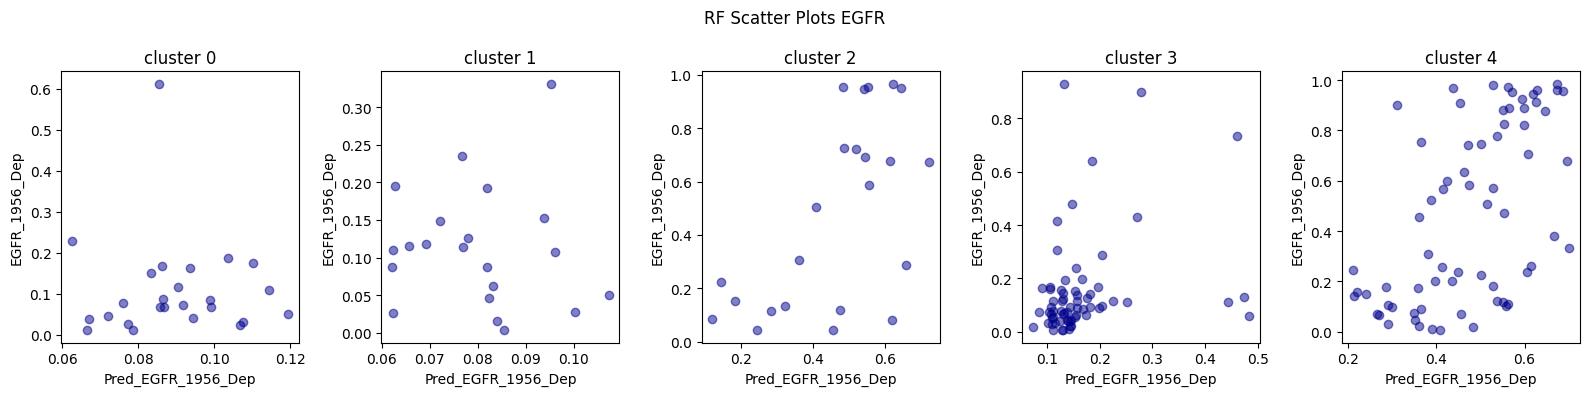

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_paths = [
    '/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c0',
    '/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c1.csv',
    '/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c2.csv',
    '/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c3.csv',
   '/content/drive/MyDrive/Colab Notebooks/HNC/RF_EGFR_filtered_arranged_hnc_table_kmeans_c4.csv'
]

dfs = []  # List to store the DataFrames

# Read each CSV file and append to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
fig.suptitle('RF Scatter Plots EGFR')

# Create scatter plots
titles = ['cluster 0', 'cluster 1', 'cluster 2',
          'cluster 3', 'cluster 4']

for i, df in enumerate(dfs):
    ax = axs[i]  # Select the subplot
    ax.scatter(df['Pred_EGFR_1956_Dep'], df['EGFR_1956_Dep'], c='darkblue', alpha=0.5)
    ax.set_xlabel('Pred_EGFR_1956_Dep')
    ax.set_ylabel('EGFR_1956_Dep')
    ax.set_title(titles[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()
